In [1]:
!pip install xgboost

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
import matplotlib.pyplot as plt

# Purpose: Imports libraries for data handling, scaling, model training, evaluation, tuning, and visualization.

In [3]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features: sepal length, sepal width, petal length, petal width
y = iris.target  # Target: 0 (setosa), 1 (versicolor), 2 (virginica)

# Convert to a pandas DataFrame
data = pd.DataFrame(X, columns=iris.feature_names)
data['target'] = y

# Purpose: Loads and organizes the dataset for analysis and modeling.

In [4]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
# Explore the dataset
print("Dataset Shape:", data.shape)
print("\nFeature Names:", iris.feature_names)
print("\nTarget Names:", iris.target_names)
print("\nFirst 5 rows of the dataset:\n", data.head())

# Purpose: Verifies the dataset’s structure and contents to ensure readiness for modeling.

Dataset Shape: (150, 5)

Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target Names: ['setosa' 'versicolor' 'virginica']

First 5 rows of the dataset:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Purpose: Separates data into training and testing sets to train and evaluate the model.

In [10]:
X_train.shape

(120, 4)

In [11]:
# Apply StandardScaler to standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Purpose: Standardizes features to have mean=0 and variance=1, ensuring consistency and stability.

In [12]:
# Convert scaled data to DMatrix
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

# Purpose: Prepares data in an optimized format for XGBoost’s native API.

In [15]:
# Define default parameters for baseline model
default_params = {
    'objective': 'multi:softmax',
    'num_class': 3,
    'max_depth': 3,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': 'mlogloss',
    'seed': 42
}


In [16]:
# Train the initial model
num_rounds = 100
initial_model = xgb.train(default_params, dtrain, num_rounds)

# Purpose: Trains a baseline model to establish initial performance.

In [17]:
initial_model

In [18]:
# Make predictions with the initial model
y_pred_initial = initial_model.predict(dtest)

In [19]:
y_pred_initial

array([1., 0., 2., 1., 1., 0., 1., 2., 1., 1., 2., 0., 0., 0., 0., 1., 2.,
       1., 1., 2., 0., 2., 0., 2., 2., 2., 2., 2., 0., 0.], dtype=float32)

In [20]:
# Evaluate the initial model
accuracy_initial = accuracy_score(y_test, y_pred_initial)
print("Initial Model Accuracy:", accuracy_initial)
print("\nInitial Model Classification Report:\n", classification_report(y_test, y_pred_initial, target_names=iris.target_names))

# Purpose: Assesses the baseline model’s performance for comparison with the tuned model.

Initial Model Accuracy: 1.0

Initial Model Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [21]:
# Hyperparameter tuning with GridSearchCV
tuning_options = {
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.3]
}

In [22]:
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, subsample=0.8, colsample_bytree=0.8, eval_metric='mlogloss', seed=42)

In [23]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=tuning_options, cv=5, scoring='accuracy', n_jobs=-1)

In [24]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=3,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3], 'max_depth': [3, 5]},
             scoring='accuracy')

In [25]:
best_params = grid_search.best_params_
print("Best Settings:", best_params)

Best Settings: {'learning_rate': 0.1, 'max_depth': 3}


In [26]:
# Convert settings for DMatrix training
train_params = {
    'objective': 'multi:softmax', 'num_class': 3, 'max_depth': best_params['max_depth'],
    'eta': best_params['learning_rate'], 'subsample': 0.8, 'colsample_bytree': 0.8,
    'eval_metric': 'mlogloss', 'seed': 42
}

In [27]:
num_rounds = 100

In [28]:
#Retrain with best settings
tuned_model = xgb.train(train_params, dtrain, num_boost_round=num_rounds)

In [29]:
# Evaluate tuned model
y_pred_tuned = tuned_model.predict(dtest)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print("Tuned Model Accuracy:", accuracy_tuned)
print("\nTuned Model Detailed Results:\n", classification_report(y_test, y_pred_tuned, target_names=iris.target_names))

Tuned Model Accuracy: 1.0

Tuned Model Detailed Results:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



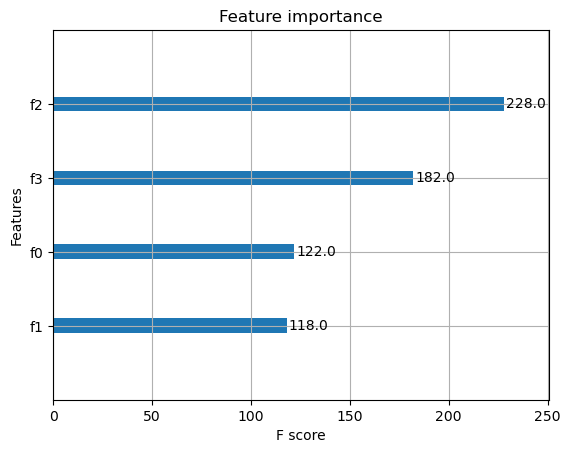

In [30]:
#Visualize feature importance
xgb.plot_importance(tuned_model)
plt.show()